In [8]:
# Load in data 
import pandas as pd

ss_df = pd.read_csv('data/subject_b_songswipe.csv')
sp_df = pd.read_csv('data/subject_b_spotify.csv')

In [9]:
# Print Statistics 
SECS_PER_MIN = 60

ss_left = ss_df.query('direction == "left"')
ss_right = ss_df.query('direction == "right"')
sp_left = sp_df.query('decision == "left"')
sp_right = sp_df.query('decision == "right"')

# Decisions
print('---DECISION STATS---')
print(f'(SongSwipe) Amount of left songs:            {str(len(ss_left))}')
print(f'(SongSwipe) Amount of right songs:           {str(len(ss_right))}')
print(f'(Spotify) Amount of left songs:              {str(len(sp_left))}')
print(f'(Spotify) Amount of right songs:             {str(len(sp_right))}')

# Time
print('---TOTAL TIME STATS---')
print(f'(SongSwipe) Total time:                      {str(round(ss_df['time(Sec)'].sum() / SECS_PER_MIN, 2))} minutes')
print(f'(SongSwipe) Total time on removed songs      {str(round(ss_left['time(Sec)'].sum() / SECS_PER_MIN, 2))} minutes')
print(f'(SongSwipe) Total time on kept songs         {str(round(ss_right["time(Sec)"].sum() / SECS_PER_MIN, 2))} minutes')
print(f'(Spotify) Total Time:                        {str(round(sp_df['time(Sec)'].sum() / SECS_PER_MIN, 2))} minutes')
print(f'(Spotify) Total time on removed songs        {str(round(sp_left['time(Sec)'].sum() / SECS_PER_MIN, 2))} minutes')
print(f'(Spotify) Total time on kept songs           {str(round(sp_right["time(Sec)"].sum() / SECS_PER_MIN, 2))} minutes')

# Statistics related to average time
print('---AVERAGE TIME STATS---')
print(f'(SongSwipe) Average time per song:           {str(round(ss_df['time(Sec)'].mean(), 2))} seconds' )
print(f'(SongSwipe) Average time to remove a song:   {str(round(ss_left['time(Sec)'].mean(), 2))} seconds')
print(f'(SongSwipe) Average time to keep a song:     {str(round(ss_right['time(Sec)'].mean(), 2))} seconds')
print(f'(Spotify) Average time per song:             {str(round(sp_df['time(Sec)'].mean(), 2))} seconds')
print(f'(Spotify) Average time to remove a song:     {str(round(sp_left['time(Sec)'].mean(), 2))} seconds')
print(f'(Spotify) Average time to keep a song:       {str(round(sp_right['time(Sec)'].mean(), 2))} seconds')


---DECISION STATS---
(SongSwipe) Amount of left songs:            19
(SongSwipe) Amount of right songs:           31
(Spotify) Amount of left songs:              38
(Spotify) Amount of right songs:             12
---TOTAL TIME STATS---
(SongSwipe) Total time:                      4.8 minutes
(SongSwipe) Total time on removed songs      1.15 minutes
(SongSwipe) Total time on kept songs         3.65 minutes
(Spotify) Total Time:                        5.92 minutes
(Spotify) Total time on removed songs        3.47 minutes
(Spotify) Total time on kept songs           2.45 minutes
---AVERAGE TIME STATS---
(SongSwipe) Average time per song:           5.76 seconds
(SongSwipe) Average time to remove a song:   3.63 seconds
(SongSwipe) Average time to keep a song:     7.06 seconds
(Spotify) Average time per song:             7.1 seconds
(Spotify) Average time to remove a song:     5.47 seconds
(Spotify) Average time to keep a song:       12.25 seconds


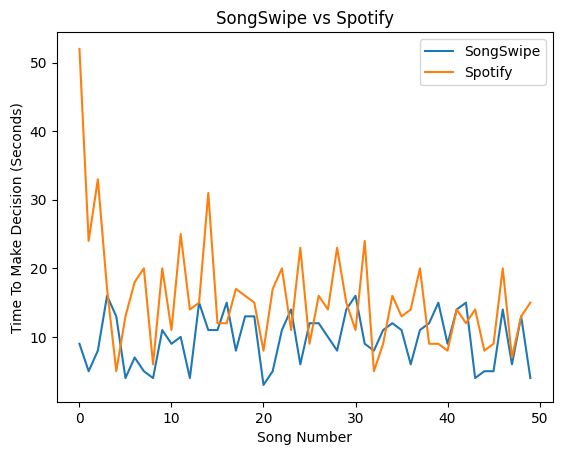

In [ ]:
# Plot for creating time graph
from matplotlib import pyplot as plt

SONG_AMOUNT = max(len(ss_df['time(Sec)']), len(sp_df))
TICK_AMOUNT = 5 

plt.xticks([x * (SONG_AMOUNT/TICK_AMOUNT) for x in range(TICK_AMOUNT+1)])
plt.title('SongSwipe vs Spotify')
plt.xlabel('Song Number')
plt.ylabel('Time To Make Decision (Seconds)')

plt.plot(ss_df['time(Sec)'], label='SongSwipe')
plt.plot(sp_df['time(Sec)'], label='Spotify')
plt.legend()

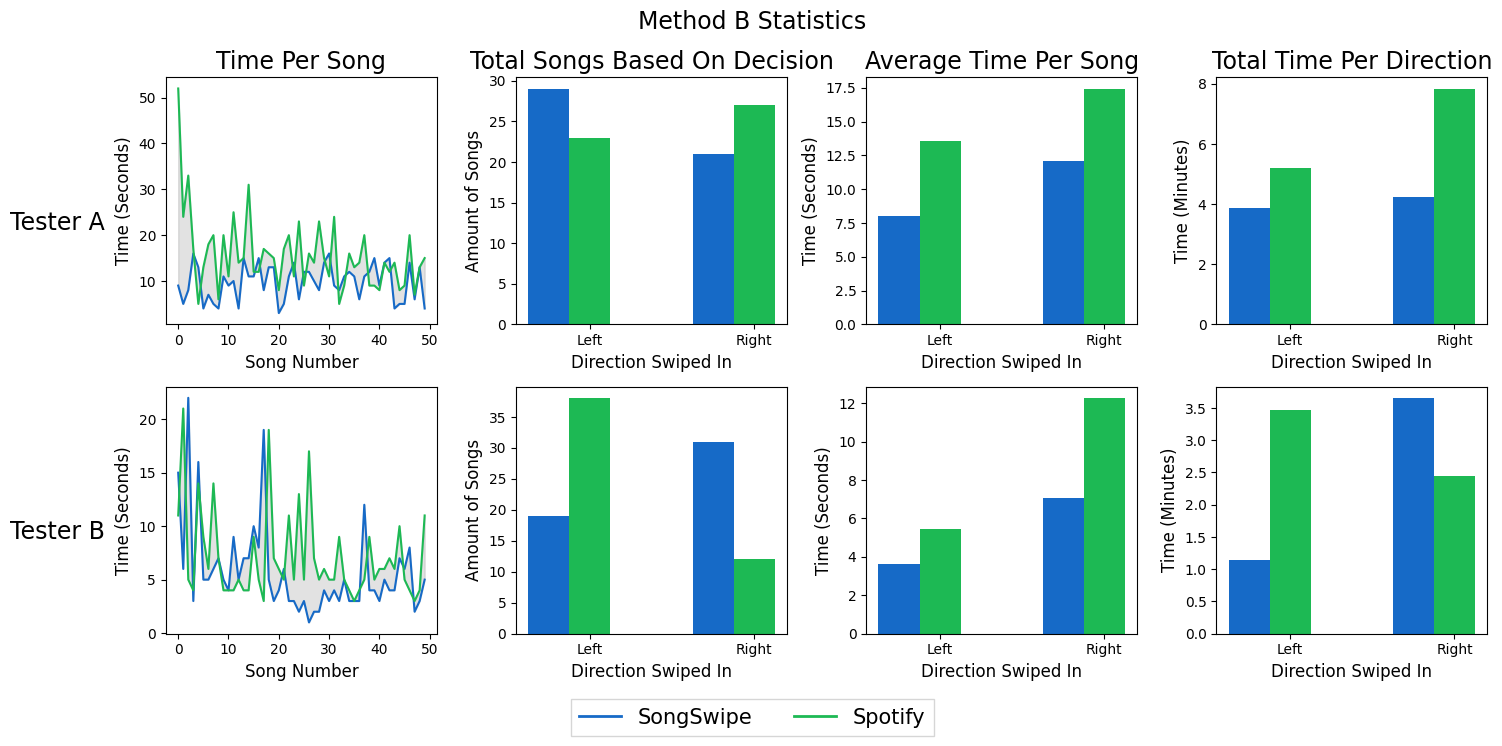

In [11]:
# Multiple plot for overall statistics for method B 
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np

# Open Data files & set constants
dfs = [
    (pd.read_csv('data/subject_a_songswipe.csv'), pd.read_csv('data/subject_a_spotify.csv')),
    (pd.read_csv('data/subject_b_songswipe.csv'), pd.read_csv('data/subject_b_spotify.csv'))
]
PARTICIPANT_COUNT = 2
TITLE_FONT_SIZE = 20
HEADER_FONT_SIZE = 17
LABEL_FONT_SIZE = 12
SEC_PER_MIN = 60
BAR_WIDTH = 0.25
SONGSWIPE_HEXCODE = "#166ac7"
SPOTIFY_HEXCODE = "#1db954"

fig, axs = plt.subplots(PARTICIPANT_COUNT, 4, figsize=(15, 7))

# Set titles and headers 
fig.suptitle('Method B Statistics', fontsize=HEADER_FONT_SIZE)
axs[0][0].set_title('Time Per Song', fontsize=HEADER_FONT_SIZE)
axs[0][1].set_title('Total Songs Based On Decision', fontsize=HEADER_FONT_SIZE)
axs[0][2].set_title('Average Time Per Song', fontsize=HEADER_FONT_SIZE)
axs[0][3].set_title('Total Time Per Direction', fontsize=HEADER_FONT_SIZE)

# Annotations for subject 
for i in range(PARTICIPANT_COUNT):
    axs[i][0].annotate(f"Tester {chr(65 + i)}", xy=(-0.4, 0.35), xytext=(0, 6), 
                        xycoords='axes fraction', textcoords='offset points',
                        ha='center', va='baseline', fontsize=HEADER_FONT_SIZE)

# Set Labels 
for i in range(PARTICIPANT_COUNT):
    axs[i][0].set_xlabel('Song Number', fontsize=LABEL_FONT_SIZE)
    axs[i][0].set_ylabel('Time (Seconds)', fontsize=LABEL_FONT_SIZE)
    axs[i][1].set_xlabel('Direction Swiped In', fontsize=LABEL_FONT_SIZE)
    axs[i][1].set_ylabel('Amount of Songs', fontsize=LABEL_FONT_SIZE)
    axs[i][2].set_xlabel('Direction Swiped In', fontsize=LABEL_FONT_SIZE)
    axs[i][2].set_ylabel('Time (Seconds)', fontsize=LABEL_FONT_SIZE)
    axs[i][3].set_xlabel('Direction Swiped In', fontsize=LABEL_FONT_SIZE)
    axs[i][3].set_ylabel('Time (Minutes)', fontsize=LABEL_FONT_SIZE)

i = 0
for df in dfs:
    # Calculate stats
    ss_left = df[0].query('direction == "left"')
    ss_right = df[0].query('direction == "right"')
    sp_left = df[1].query('decision == "left"')
    sp_right = df[1].query('decision == "right"')

    # Decision stats
    SS_AMOUNT_LEFT = len(ss_left)
    SS_AMOUNT_RIGHT = len(ss_right)
    SP_AMOUNT_LEFT = len(sp_left)
    SP_AMOUNT_RIGHT = len(sp_right)
    
    SS_AMOUNT_STATS = [SS_AMOUNT_LEFT, SS_AMOUNT_RIGHT]
    SP_AMOUNT_STATS = [SP_AMOUNT_LEFT, SP_AMOUNT_RIGHT]

    # Total time stats
    SS_REMOVED_TIME = round(ss_left['time(Sec)'].sum() / SEC_PER_MIN, 2)
    SS_KEEP_TIME = round(ss_right['time(Sec)'].sum() / SEC_PER_MIN, 2)

    SP_REMOVED_TIME = round(sp_left['time(Sec)'].sum() / SEC_PER_MIN, 2)
    SP_KEEP_TIME = round(sp_right['time(Sec)'].sum() / SEC_PER_MIN, 2)
    
    SS_TOTAL_STATS = [SS_REMOVED_TIME, SS_KEEP_TIME]
    SP_TOTAL_STATS = [SP_REMOVED_TIME, SP_KEEP_TIME]

    # Statistics related to average time
    SS_AVERAGE_REMOVE = round(ss_left['time(Sec)'].mean(), 2)
    SS_AVERAGE_KEPT = round(ss_right['time(Sec)'].mean(), 2)
    
    SP_AVERAGE_REMOVE = round(sp_left['time(Sec)'].mean(), 2)
    SP_AVERAGE_KEPT = round(sp_right['time(Sec)'].mean(), 2)

    SS_AVERAGE_STATS = [SS_AVERAGE_REMOVE, SS_AVERAGE_KEPT]
    SP_AVERAGE_STATS = [SP_AVERAGE_REMOVE, SP_AVERAGE_KEPT]

    # Plot time per song curve
    axs[i][0].plot(df[0]['time(Sec)'], label='SongSwipe', color=SONGSWIPE_HEXCODE)
    axs[i][0].plot(df[1]['time(Sec)'], label='Spotify', color=SPOTIFY_HEXCODE)
    axs[i][0].fill_between(np.arange(len(df[0]['time(Sec)'])), df[0]['time(Sec)'], df[1]['time(Sec)'], alpha=0.2, color="#6f7070")

    # Plot decision bars
    br1 = np.arange(len(SS_AMOUNT_STATS))
    br2 = [x + BAR_WIDTH for x in br1]
    
    axs[i][1].bar(br1, SS_AMOUNT_STATS, width=BAR_WIDTH, color=SONGSWIPE_HEXCODE)
    axs[i][1].bar(br2, SP_AMOUNT_STATS, width=BAR_WIDTH, color=SPOTIFY_HEXCODE)
    axs[i][1].set_xticks([r + BAR_WIDTH for r in range(len(SS_AMOUNT_STATS))], ['Left', 'Right'])

    # Plot total and average bars
    br1 = np.arange(len(SS_AVERAGE_STATS))
    br2 = [x + BAR_WIDTH for x in br1]

    axs[i][2].bar(br1, SS_AVERAGE_STATS, width=BAR_WIDTH, color=SONGSWIPE_HEXCODE)
    axs[i][2].bar(br2, SP_AVERAGE_STATS, width=BAR_WIDTH, color=SPOTIFY_HEXCODE)
    axs[i][2].set_xticks([r + BAR_WIDTH for r in range(len(SS_AVERAGE_STATS))], ['Left', 'Right'])

    axs[i][3].bar(br1, SS_TOTAL_STATS, width=BAR_WIDTH, color=SONGSWIPE_HEXCODE)
    axs[i][3].bar(br2, SP_TOTAL_STATS, width=BAR_WIDTH, color=SPOTIFY_HEXCODE)
    axs[i][3].set_xticks([r + BAR_WIDTH for r in range(len(SS_TOTAL_STATS))], ['Left', 'Right'])


    i += 1

lines = [Line2D([0], [0], color=SONGSWIPE_HEXCODE, lw=2), Line2D([0], [0], color=SPOTIFY_HEXCODE, lw=2)]
fig.legend(handles=lines, labels=['SongSwipe', 'Spotify'], loc='upper center', 
           bbox_to_anchor=(0.5, 0.01), fancybox=False, shadow=False, ncol=2, prop={'size': 15})
plt.tight_layout()
plt.savefig('figs/method_b_statistics.png')